## **1. Kütüphaneleri İçe Aktarma**

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

## **2. Veri Setini İçe Aktarma**

In [90]:
df = pd.read_csv("netflix_titles.csv")

In [91]:
# veri setinin ilk beş satırı
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [92]:
# veri setinin satır ve sütun sayısı
df.shape

(8807, 12)

#### **Sütunların Veri Tipi**

In [93]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

#### **Sütunların İsimleri**

In [94]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### **Veri Seti Hakkında Bilgi**

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [96]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## **Eksik Değerleri Kontrol Etme ve Temizleme**

In [97]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

* Verileri incelediğimizde "director", "cast" ve "country" sütunlarında bol miktarda eksik veri olduğunu görüyoruz. 

In [98]:
df.isnull().sum().sum()

4307

* Sütunlardaki eksik değerleri "unknown" ile değiştirelim.

In [99]:
df.director.fillna(value="unknown", inplace=True)

In [100]:
df.cast.fillna(value="unknown", inplace=True)

In [101]:
df.country.fillna(value="unknown", inplace =True)

* Kalan birkaç eksik değer içeren satırı silelim.

In [102]:
df.dropna(inplace=True)

In [103]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

* "show_id" sütununun gereksiz olduğunu düşünüyorum. O yüzden kaldırıcam.

In [136]:
df.drop(columns="show_id", inplace=True)

### **İçerik Türleri**

In [104]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [105]:
df["type"].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [106]:
# İçerik türlerinin birbirine oranını görselleştirelim.

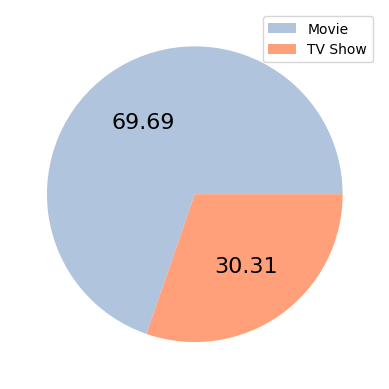

In [107]:
plt.pie(df.type.value_counts(), 
        labels = df.type.value_counts().index, 
        labeldistance = None, autopct="%.2f", 
        textprops = {'fontsize': 16,}, 
        colors = ['lightsteelblue','lightsalmon' ] )
plt.legend()
plt.show()

### **Veri Setindeki Sütunları Düzenleyelim**

In [108]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##### **İlk olarak "date_added" sütunundaki tarihleri başka bir sütunda ay ve yıl olarak ayırmak istiyorum**

In [110]:
df["date_added"]

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8790, dtype: object

* Sütundaki değerleri datetime objesine dönüştürücem. Bazı verilerin başında boşluk olduğunu biliyorum. Bunları düzeltelim.

In [121]:
has_whitespaces = df["date_added"].str.startswith(" ")
indexes_with_whitespace = df[has_whitespaces].index

print("Boşluk içeren satırların indeksleri:")
print(indexes_with_whitespace)

Boşluk içeren satırların indeksleri:
Index([6079, 6177, 6213, 6279, 6304, 6318, 6357, 6361, 6368, 6393, 6451, 6456,
       6457, 6460, 6519, 6549, 6560, 6603, 6671, 6678, 6742, 6763, 6766, 6803,
       6822, 6868, 6871, 6885, 6890, 6894, 6922, 6935, 6941, 6955, 6969, 6970,
       7029, 7148, 7217, 7287, 7307, 7331, 7342, 7368, 7409, 7457, 7521, 7529,
       7574, 7576, 7586, 7628, 7646, 7679, 7705, 7709, 7721, 7729, 7806, 7850,
       7896, 7906, 7953, 7982, 8022, 8064, 8070, 8147, 8174, 8189, 8193, 8257,
       8271, 8311, 8315, 8357, 8378, 8422, 8423, 8424, 8442, 8510, 8518, 8539,
       8557, 8684, 8712, 8755],
      dtype='int64')


In [122]:
df["date_added"] = df["date_added"].str.strip()

* Sütundaki verileri datetime objesine dönüştürüp yıl ve ay olarak ayırıp yeni sütunlar oluşturalım.

In [124]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

In [125]:
df["date_added"]

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8790, dtype: datetime64[ns]

In [127]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [129]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9


In [131]:
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,


In [132]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,


## **Sorular**

### **1. Yıllar İçinde Netflix'e Eklenen Film ve TV Show Sayısı Kaçtır?**

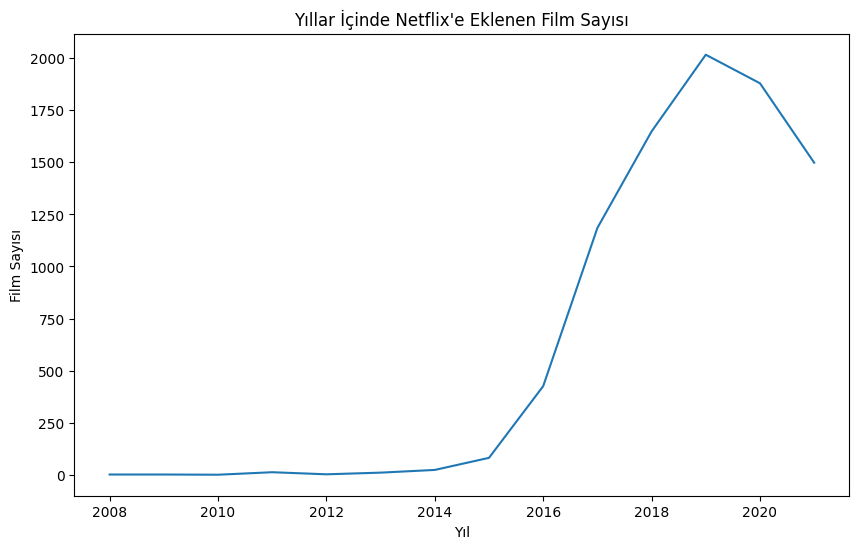

In [140]:
title_counts = df.groupby('year_added')['title'].count()

plt.figure(figsize=(10, 6))
title_counts.plot(kind='line')
plt.title("Yıllar İçinde Netflix'e Eklenen İçerik Sayısı")
plt.xlabel('Yıl')
plt.ylabel('İçerik Sayısı')
plt.show()


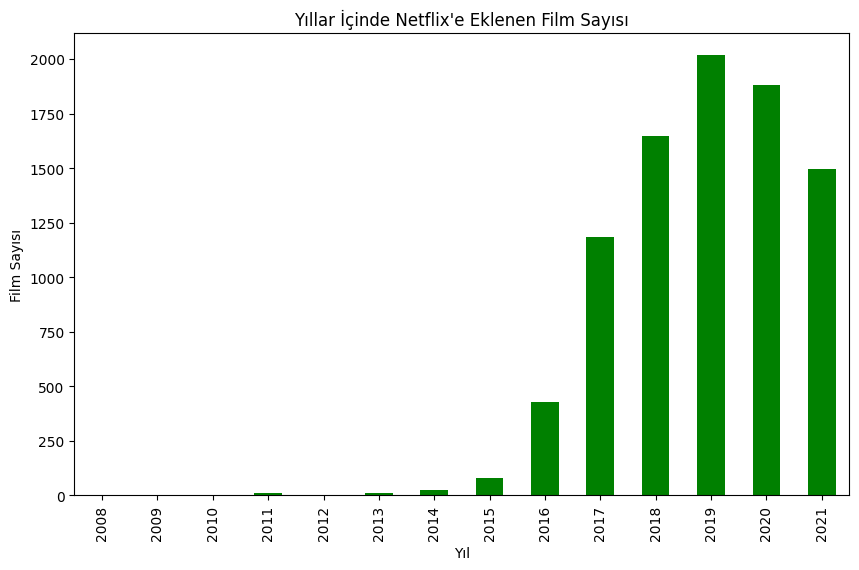

In [142]:
plt.figure(figsize=(10, 6))
title_counts.plot(kind='bar', color='green')
plt.title("Yıllar İçinde Netflix'e Eklenen İçerik Sayısı")
plt.xlabel('Yıl')
plt.ylabel('İçerik Sayısı')
plt.show()

In [143]:
title_counts

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: title, dtype: int64

In [145]:
# TV Show ve Movie'ye göre verilerin ayrılması
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

# Plotly Express kullanarak grafik oluşturma
fig = px.histogram(df, x="year_added", color="type", barmode="group", title="Content added over the years")

# Grafik gösterimi
fig.show()

In [155]:
# TV Show ve Movie'ye göre verilerin ayrılması
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

# Yıllara göre gruplanmış sayıları alma
vc1 = d1["year_added"].value_counts().reset_index()
vc1 = vc1.rename(columns={"year_added": "year_added", "index": "count_tv_shows"}) # "count" yerine "count_tv_shows" adını kullan

vc2 = d2["year_added"].value_counts().reset_index()
vc2 = vc2.rename(columns={"year_added": "year_added", "index": "count_movies"}) # "count" yerine "count_movies" adını kullan

# Plotly Express kullanarak çizgi grafiği oluşturma
fig = px.line(vc1, x="year_added", y="count", title="Content added over the years (TV Shows)", markers=True)
fig.add_scatter(x=vc2["year_added"], y=vc2["count"], mode="lines", name="Movies", line=dict(color="green"))

# Grafik gösterimi
fig.show()